In [1]:
import pandas as pd
import numpy as np

In [2]:
import yfinance as yf

In [3]:
# Using yahoo finnace dor data and used apple stock data
data = yf.download("AAPL", start="2015-01-01", end="2018-01-01")
df = data.copy()
df.info()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 755 entries, 2015-01-02 to 2017-12-29
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   755 non-null    float64
 1   (High, AAPL)    755 non-null    float64
 2   (Low, AAPL)     755 non-null    float64
 3   (Open, AAPL)    755 non-null    float64
 4   (Volume, AAPL)  755 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 35.4 KB


In [4]:
x = data['Open']

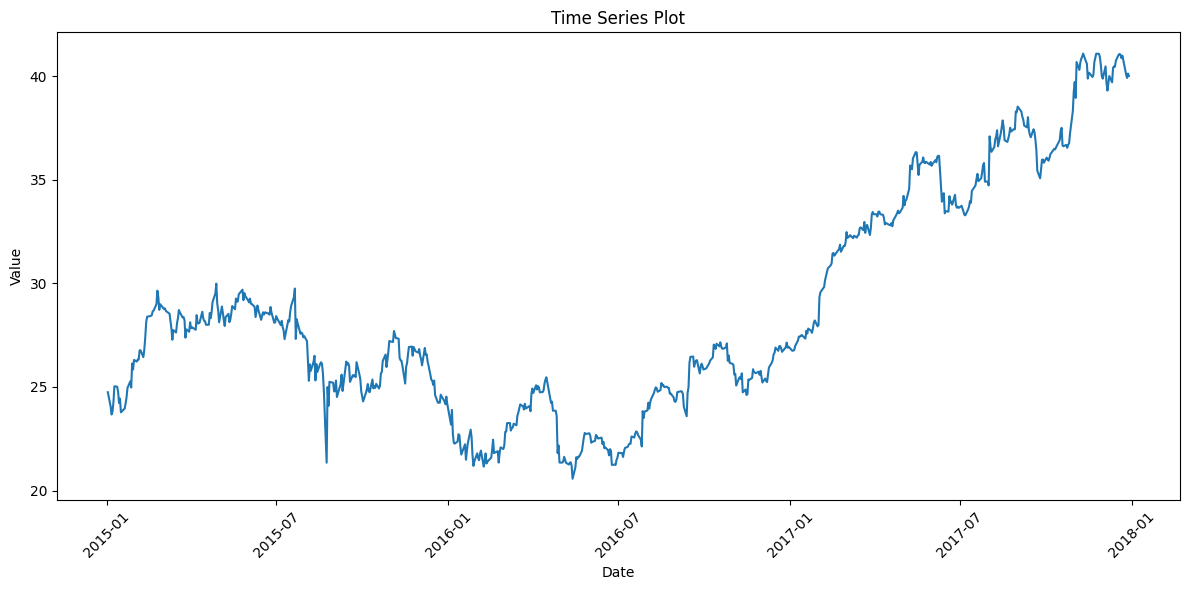

In [5]:
# Ploting data

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

plt.figure(figsize=(12, 6))
plt.plot(x.index,x)  # replace 'value' with your actual column name

plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Plot')

# Format the x-axis dates
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as YYYY-MM
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))  # Show every 3rd month

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [7]:
# Trnsforming data by using power transformers 
from sklearn.preprocessing import PowerTransformer,MinMaxScaler
pt = MinMaxScaler() #PowerTransformer('box-cox')
x_transformed_train = pt.fit_transform(x)

In [9]:
x_after_transformed_train = pd.DataFrame(x_transformed_train,columns = ['Price'])
x_after_transformed_train.skew()

Price    0.714386
dtype: float64

In [178]:
# Creating data for model from the given data 
X_, y_ = [], []

time_steps = 15 # Choosing time stamp

for i in range(time_steps,x_transformed_train.shape[0]):
    X_.append(x_transformed_train[i-time_steps:i,0])
    y_.append(x_transformed_train[i,0])  # next day's open and close

X_train = np.array(X_)  # (219, 30, 2)
y_train = np.array(y_)  # (219, 2)

x_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))


In [12]:
print(x_train.shape,y_train.shape)

(740, 15, 1) (740,)


In [13]:
# Cretig training data for model

data1 = yf.download("AAPL", start="2018-01-01", end="2018-3-30")


normxtest = pt.transform(data1['Open'])

X_t, y_t = [],[] 

for i in range(time_steps,len(normxtest)):
    X_t.append(normxtest[i-time_steps:i,0])
    y_t.append(normxtest[i,0])  # next day's open and close

X_test = np.array(X_t)  # (219, 30, 2)
y_test = np.array(y_t)  # (219, 2)
x_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))


[*********************100%***********************]  1 of 1 completed


In [15]:
y_test_norm = data1['Open'].iloc[time_steps:len(normxtest)]

In [17]:
print(x_test.shape,y_test.shape)

(46, 15, 1) (46,)


In [143]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()

model.add(LSTM(50,input_shape=(x_train.shape[1], x_train.shape[2]),return_sequences=True,activation='tanh'))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))

model.add(Dense(1))

model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_error'])


C:\Users\vipin\anaconda3\envs\datascience\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [144]:
# Using early for the sake of overfitting
stop_early = EarlyStopping(monitor='mean_absolute_error', patience=10)

In [145]:

history = model.fit(x_train, y_train, epochs=150,batch_size = 40,validation_data = (x_test,y_test),callbacks = [stop_early])

Epoch 1/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - loss: 0.0899 - mean_absolute_error: 0.2230 - val_loss: 0.0862 - val_mean_absolute_error: 0.2810
Epoch 2/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0109 - mean_absolute_error: 0.0778 - val_loss: 0.0142 - val_mean_absolute_error: 0.0977
Epoch 3/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0032 - mean_absolute_error: 0.0433 - val_loss: 0.0107 - val_mean_absolute_error: 0.0865
Epoch 4/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0024 - mean_absolute_error: 0.0377 - val_loss: 0.0112 - val_mean_absolute_error: 0.0878
Epoch 5/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0026 - mean_absolute_error: 0.0391 - val_loss: 0.0094 - val_mean_absolute_error: 0.0829
Epoch 6/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0023 - mean_absolute_error: 0.0365 - val_loss: 0.0091 - val_mean_absolute_error: 0.0819
Epoch 7/150
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0022 - mean_absolute_error: 0.0347 - v

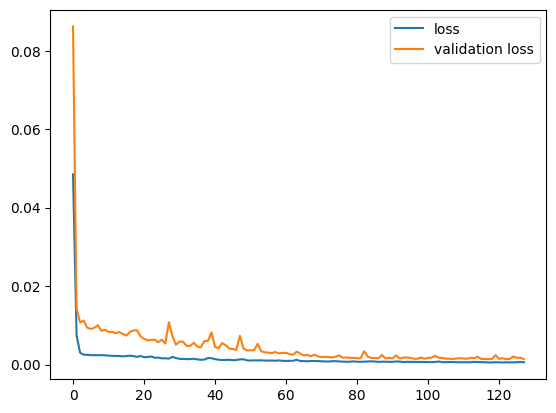

In [146]:
# ploting predict and actial normaized output
plt.plot(history.history['loss'],label = "loss")
plt.plot(history.history['val_loss'],label = 'validation loss')
plt.legend()
plt.show()


In [163]:
y_pred = model.predict(x_test)
y_pred_train = model.predict(x_train)



2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


In [169]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
# Errors of trining data

print("RMSE:", np.sqrt(mean_squared_error(y_train, y_pred_train)))
print("MAE:", mean_absolute_error(y_train, y_pred_train))


RMSE: 0.022453127928532587
MAE: 0.01542624859565278


In [170]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Errors of testing data

print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("MAE:", mean_absolute_error(y_test, y_pred))


RMSE: 0.03713737950669538
MAE: 0.028896685921162197


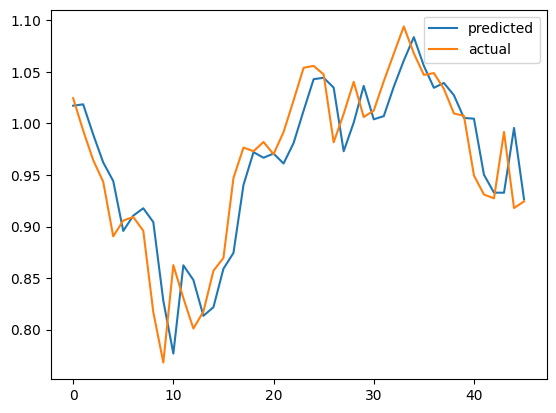

In [171]:
# ploting predict and actial output
plt.plot(y_pred,label='predicted')
plt.plot(y_test,label='actual')
plt.legend()
plt.show()


In [172]:
#### Denormalizing the data
y_pred_normal = pt.inverse_transform(y_pred.reshape(-1,1))


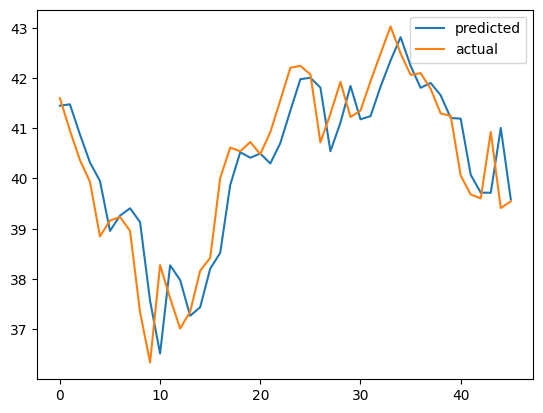

In [173]:
# Ploting line blot of actual stock prices after normalizing predicted price
plt.plot(y_pred_normal,label='predicted')
plt.plot(y_test_norm.values,label='actual')
plt.legend()

# Showing the plot
plt.show()


In [177]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#y_pred = model.predict(X_test)
print("RMSE:",np.sqrt(mean_squared_error(y_test_norm.values, y_pred_normal)))
print("MAE:", mean_absolute_error(y_test_norm.values, y_pred_normal))


RMSE: 0.762278807582517
MAE: 0.5931309583048284
